# Zadatak 1.

Izvedite postupak učenja koji je prikladan za ovakvu mrežu a koji se temelji na gradijentnom spustu.

Ako $x$ je $A_i$ i $y$ je $B_i$ tada $z = p_ix + q_iy + r_i$
$$ \pi_i = \alpha_i \beta_i $$
$$ \alpha_i = \frac{1}{1 + e^{b_i(x-a_i)}} $$
$$ z = p_i x + q_i y + r_i $$
$$ o_k = \frac{\sum_{i=1}^{m}\pi_i z_i }{\sum_{i=1}^{m} \pi_i } $$
$ a_i $
$$ \frac{\partial E_k}{\partial a_i} = \frac{\partial E_k}{\partial o_k}\frac{\partial o_k}{\partial \pi_i}\frac{\partial \pi_i}{\partial \alpha_i}\frac{\partial \alpha_i}{\partial a_i} $$
$$ \frac{\partial E_k}{\partial o_k} = -(y_k - o_k) $$
$$ \frac{\partial o_k}{\partial \pi_i} = \frac{\sum_{j=1,j!=i}^{m} \pi_j(z_i-z_j)}{(\sum_{j=1}^{m} \pi_j)^2} $$
$$ \frac{\partial \pi_i}{\partial \alpha_i} = \beta_i $$
$$ \frac{\partial \alpha_i}{\partial a_i} = b_i\alpha_i(1-\alpha_i) $$
$$ \frac{\partial E_k}{\partial a_i} = -(y_k - o_k) \frac{\sum_{j=1,j!=i}^{m} \pi_j(z_i-z_j)}{(\sum_{j=1}^{m} \pi_j)^2} \pi_i b_i(1-\alpha_i) $$

$ b_i $
$$ \frac{\partial E_k}{\partial b_i} = \frac{\partial E_k}{\partial o_k}\frac{\partial o_k}{\partial \pi_i}\frac{\partial \pi_i}{\partial \alpha_i}\frac{\partial \alpha_i}{\partial b_i} $$
$$ \frac{\partial \alpha_i}{\partial b_i} = -(x - a_i)\alpha_i(1-\alpha_i) $$
$$ \frac{\partial E_k}{\partial b_i} = -(y_k - o_k) \frac{\sum_{j=1,j!=i}^{m} \pi_j(z_i-z_j)}{(\sum_{j=1}^{m} \pi_j)^2} \pi_i (a_i - x)(1-\alpha_i) $$

$ p_i $
$$ \frac{\partial E_k}{\partial p_i} = \frac{\partial E_k}{\partial o_k} \frac{\partial o_k}{\partial z_i} \frac{\partial z_i}{\partial p_i} $$
$$ \frac{\partial o_k}{\partial z_i} = \frac{\pi_i}{\sum_{j=1}^{m} \pi_j} $$
$$ \frac{\partial z_i}{\partial p_i} = x_i $$
$$ \frac{\partial E_k}{\partial p_i} = -(y_k - o_k) \frac{\pi_i x_i}{\sum_{j=1}^{m} \pi_j}  $$

$ q_i $
$$ \frac{\partial E_k}{\partial q_i} = \frac{\partial E_k}{\partial o_k} \frac{\partial o_k}{\partial z_i} \frac{\partial z_i}{\partial q_i} $$
$$ \frac{\partial z_i}{\partial q_i} = y_i $$
$$ \frac{\partial E_k}{\partial q_i} = -(y_k - o_k) \frac{\pi_i y_i}{\sum_{j=1}^{m} \pi_j}  $$

$ r_i $
$$ \frac{\partial E_k}{\partial r_i} = \frac{\partial E_k}{\partial o_k} \frac{\partial o_k}{\partial z_i} \frac{\partial z_i}{\partial r_i} $$
$$ \frac{\partial z_i}{\partial r_i} = 1 $$
$$ \frac{\partial E_k}{\partial r_i} = -(y_k - o_k) \frac{\pi_i}{\sum_{j=1}^{m} \pi_j}  $$

# Zadatak 5.
Za neuro-fuzzy sustav s kojim ste zadovoljni (u smislu da dovoljno dobro
aproksimira zadane primjere za učenje) nacrtajte kako izgledaju
naučene funkcije pripadnosti

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def sigma(a, b, x):
    return 1 / (1 + np.exp(b * (x - a)))

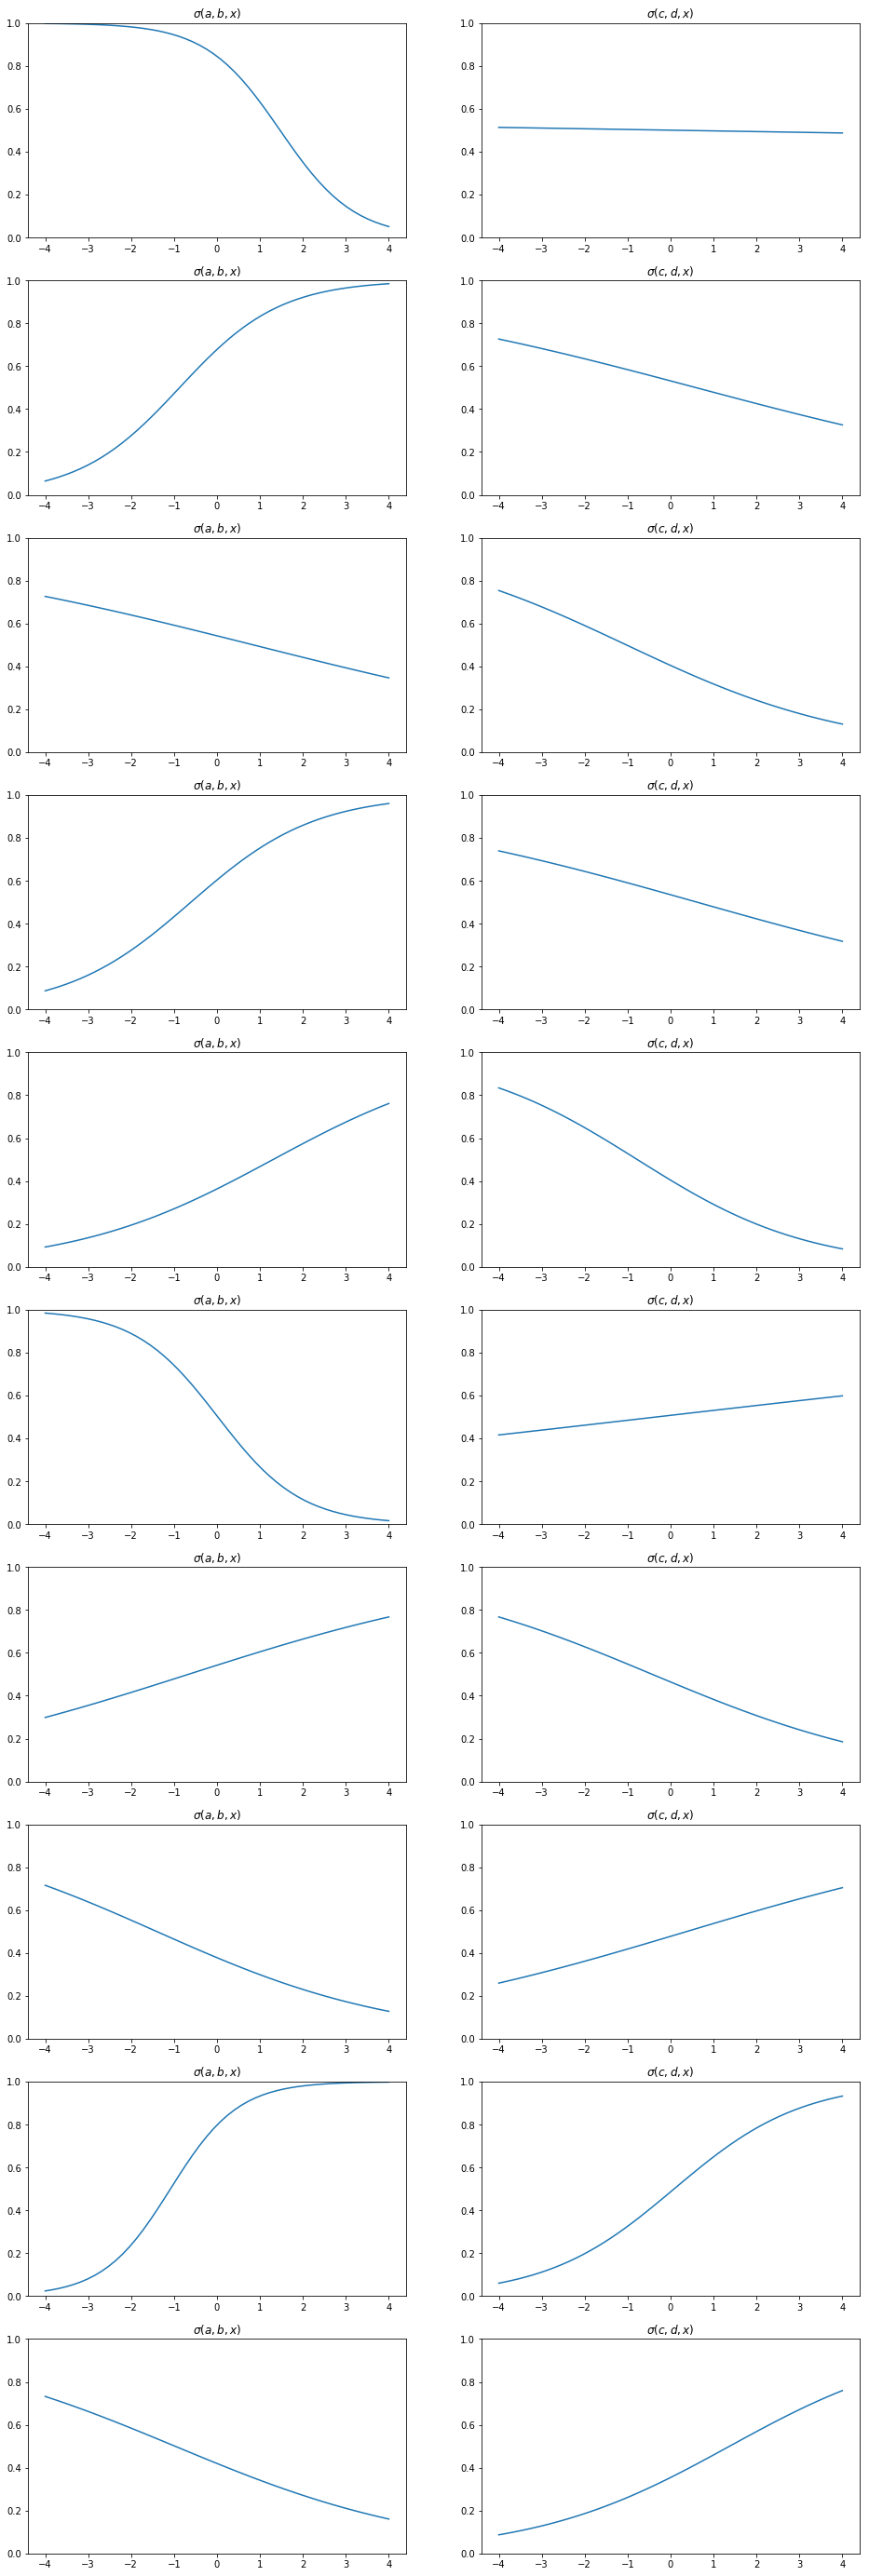

In [17]:
f = open("rules.txt", "r")
rules = [[float(x) for x in line.strip().split(" ")] for line in f.readlines()]
f.close()

fig = plt.figure(figsize=(16, 5 * len(rules)))
X = np.linspace(-4, 4)
i = 1
for idx, rule in enumerate(rules):
    a, b, c, d, p, q, r = rule
    
    plt.subplot(len(rules), 2, i)
    plt.title(r'$\sigma(a,b,x)$')
    plt.ylim(ymax=1)
    plt.plot(X, sigma(a, b, X))
    i = i + 1

    plt.subplot(len(rules), 2, i)
    plt.title(r'$\sigma(c,d,x)$')
    plt.ylim(ymax=1)
    plt.plot(X, sigma(c, d, X))
    i = i + 1
plt.show()

# Zadatak 6. 

Za neuro-fuzzy sustav s kojim ste zadovoljni nacrtajte funkciju pogreške uzorka _δ(x, y)_ koja je definirana kao razlika između vrijednosti koji neuro-fuzzy sustav daje na izlazu za točku _(x, y)_ i stvarne vrijednosti koju zadana funkcija poprima u točki _(x, y)_.

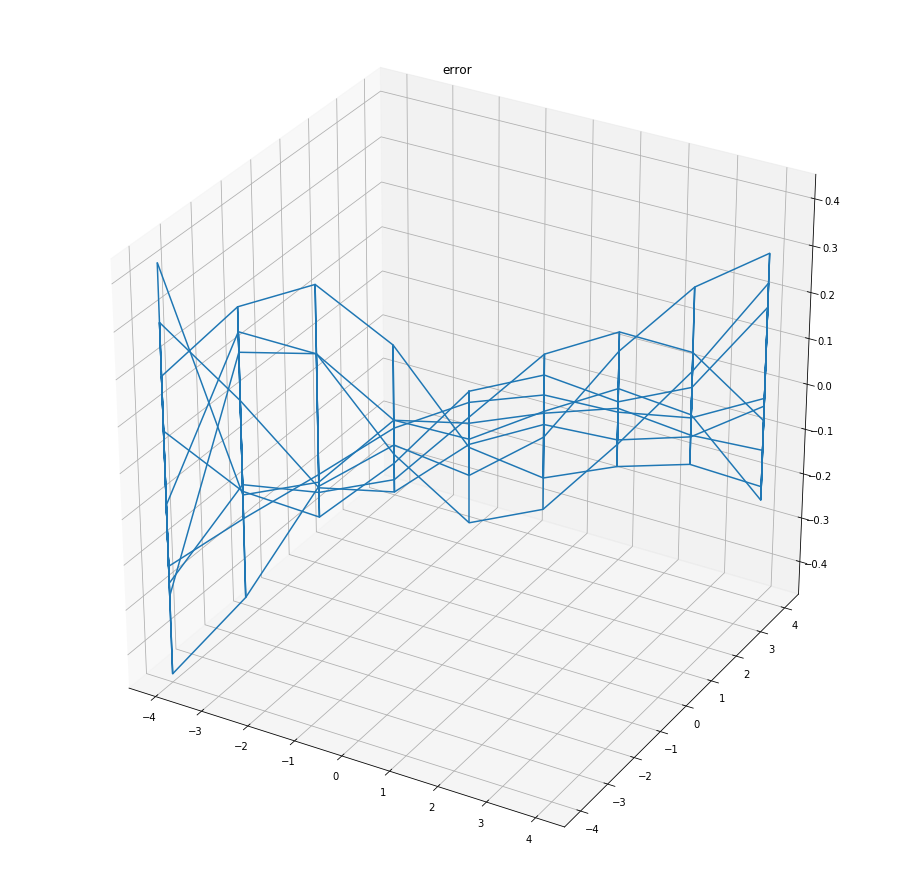

In [37]:
f = open("errors.txt", "r")
errors = np.array([[float(x) for x in line.strip().split(" ")] for line in f.readlines()])
f.close()
X = np.linspace(-4,4, 9)
Y = np.linspace(-4,4, 9)
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d', title='error')
ax.plot_wireframe(X, Y, errors)

# Zadatak 7.

Za neuro-fuzzy sustav s kojim ste zadovoljni ponovite postupak učenja s obje inačice algoritma i u datoteku pohranite pogrešku koju sustav radi nakon svake epohe učenja.

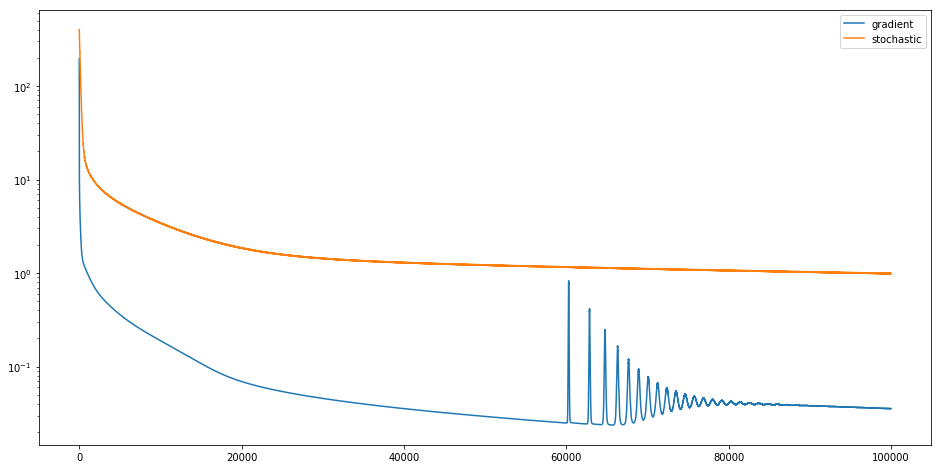

In [39]:
f = open("mses_gr.txt", "r")
errors_gradient = [float(x) for x in f.readlines()]
f.close()
f = open("mses_st.txt", "r")
errors_stochastic = [float(x) for x in f.readlines()]
f.close()

plt.figure(figsize=(16,8))
plt.plot(errors_gradient, label='gradient')
plt.plot(errors_stochastic, label='stochastic')
plt.yscale('log')
plt.legend()
plt.show()

# Zadatak 8.

Pokušajte se igrati s različitim vrijednostima stope učenja (η). Koja je prikladna vrijednost i kako ona utječe na brzinu konvergencije algoritma? Za obje inačice algoritma i za tri rubne vrijednosti stope učenja (vrlo mala, baš prikladna te vrlo velika) nacrtajte graf kretanja srednje kvadratne pogreške ovisno o epohi.

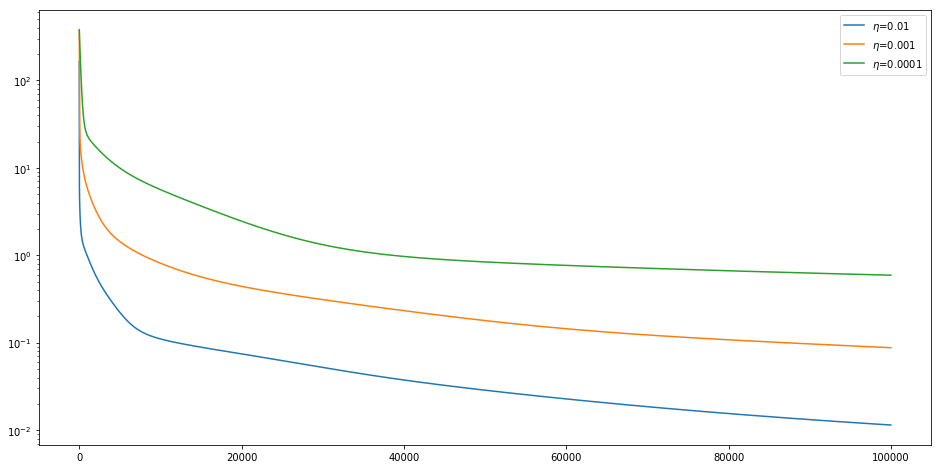

In [40]:
f = open("etas_1.txt", "r")
etas_1 = [float(x) for x in f.readlines()]
f.close()
f = open("etas_2.txt", "r")
etas_2 = [float(x) for x in f.readlines()]
f.close()
f = open("etas_3.txt", "r")
etas_3 = [float(x) for x in f.readlines()]
f.close()

plt.figure(figsize=(16,8))
plt.plot(etas_1, label=r'$\eta$=0.01')
plt.plot(etas_2, label=r'$\eta$=0.001')
plt.plot(etas_3, label=r'$\eta$=0.0001')
plt.yscale('log')
plt.legend()
plt.show()